<a href="https://colab.research.google.com/github/ITMK/DataLitMT/blob/main/colab_companion_notebook_string_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

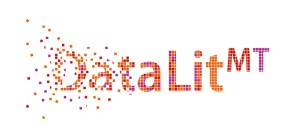

# Data Evaluation – Companion Notebook for MT Quality Evaluation Metrics Based on String Matching

This is a companion notebook for our [Basic](https://colab.research.google.com/drive/1KY2qGmDoJOSOPewseVszL0u8J-x7xa7I?usp=sharing) and [Advanced](https://colab.research.google.com/drive/1UgsqgN-6yfDESU7Geei4RXzJShEQNViZ?usp=sharing) MT Quality Evaluation notebooks, in which we explain the concepts of *precision*, *recall*, *F-Measure* and *n-grams*. These concepts are required for a full understanding of the operating principles of traditional MT quality evaluation metrics based on string matching (and F-Measure is also required for a full understanding of the embedding-based metric BERTScore).

# 1 Precision and Recall
Precision and recall are two fundamental concepts employed by many MT quality scores (hence their relevance to our MT Quality Evaluation notebooks). Let's first look at the formula for precision:  

$$Precision = \frac{\mbox{#}\;words\;in\;hypothesis\;that\;match\;reference}{\mbox{#}\;words\;in\;hypothesis}$$

As we see here, precision is calculated as the number of words in the MT hypothesis that are also present in the human reference, divided by the number of words in the MT hypothesis. We will look at an example below, but first, let's have a look at the formula for recall:

$$Recall = \frac{\mbox{#}\;words\;in\;hypothesis\;that\;match\;reference}{\mbox{#}\;words\;in\;reference}$$

As you see, the formulas for recall and precision are almost identical and differ only slightly in their denominator. Recall is calculated as the number of words in the MT hypothesis that are also present in the human reference (same as in precision) divided by the number of words in the reference. Run the code below to see an example of how precision and recall are calculated for actual hypotheses and references.

In [ ]:
# Import NLTK, precision() and recall() functions
import nltk
from nltk.metrics.scores import precision, recall

# Define reference and hypothesis
reference_p_r = {'This', 'is', 'a', 'simple', 'test', 'sentence'}
hypothesis_p_r = {'This', 'is', 'an', 'example', 'sentence'}

# Calculate and print precision and recall scores
precision = precision(reference_p_r, hypothesis_p_r)
recall = recall(reference_p_r, hypothesis_p_r)

print(f"Precision: {precision}\n")
print(f"Recall: {recall}")

Let's look at the precision score first. There are three words (*This*, *is* and *sentence*) which appear both in the hypothesis and in the reference, so our numerator is 3. The hypothesis (*This is an example sentence*) has 5 words, so our denominator is 5, and $\frac{3}{5} = 0.6$.  
For recall, we keep 3 in the numerator (three words which appear both in the hypothesis and in the reference). The number of words in the reference (*This is a simple test sentence*) is 6, so our denominator is 6, and $\frac{3}{6} = 0.5$.  
The basic premise of most automatic MT quality scores employing precision and recall is that the more similar the hypothesis is to the reference, the higher the MT quality is (the ideal case being identity between hypothesis and reference). From this perspective, precision tells us how many 'wrong' words the MT model produced (i.e. words, that are not in the human reference translation). A precision score of 0.6 would thus tell us that the MT model produced 60% of 'right' words and 40% of 'wrong' words. Recall, on the other hand, tells us how many words the MT model 'missed' or failed to produce (i.e., words that are in the reference translation but do not appear in the hypothesis). A recall score of 0.5 thus tells us that the MT model failed to produce 50% of the words which are present in the reference translation. Therefore, we strive for a high precision score and a high recall score (precision = 1 and recall = 1 would mean that hypothesis and reference are identical). Precision is used by the BLEU metric covered in our MT Quality Evaluation notebook. Both precision and recall are used by the F-Measure metric discussed below, which in turn is used by the embedding-based metric BERTScore also covered in our MT Quality Evaluation notebook The source code of the precision and recall functions used in this notebook can be found [here](https://www.nltk.org/_modules/nltk/metrics/scores.html).

# 2 F-Measure

We have seen that precision and recall provide two slightly different perspectives on the quality of a machine translation model. Ideally, our model should not generate wrong words (precision) and it should not miss any words present in the reference translation (recall). **F-Measure** combines precision and recall into a single score. Here is the formula:  

$$F\mbox{-}Measure = \frac{precision \times recall}{\frac{precision\;+\;recall}{2}}$$

As you can see, the formula for F-Measure is a fraction where the numerator is the product of precision and recall and the denominator is itself a fraction, here the sum of precision and recall divided by two. If you know your mathematics well, you may see that this formula calculates the harmonic mean (one of the three Pythagorean means, together with the arithmetic mean and the geometric mean) of precision and recall.  
Let's have a look at an example.  

In [ ]:
# Import f_measure(), precision() and recall() functions
import nltk
from nltk.metrics.scores import f_measure
from nltk.metrics.scores import precision, recall

# Define reference and hypothesis
reference_f = {'This', 'is', 'a', 'simple', 'test', 'sentence'}
hypothesis_f = {'This', 'is', 'an', 'example', 'sentence'}

# Calculate and print precision, recall and f-measure scores
precision = precision(reference_p_r, hypothesis_p_r)
recall = recall(reference_p_r, hypothesis_p_r)
f_measure = f_measure(reference_f, hypothesis_f)

print(f"Precision: {precision}\n")
print(f"Recall: {recall}\n")
print(f"F-Measure: {f_measure}")

For your convenience, the code also prints out the precision and recall values for the sentence pair. If you plug these into the F-Measure formula above, you should arrive at the same F-Measure as calculated by the NLTK function.  
The major disadvantage of F-Measure is that this metric does not take word order into account. For example, if you change the hypothesis to *Example this sentence an is*, you'll get the exact same score as for the grammatically correct hypothesis *This is an example sentence*. And while it is certainly true that word order errors are significantly less frequent in neural MT than they were in phrase-based statistical MT, you should still keep this limitation of F-Measure in mind.  
The source code of the F-Measure function used in this notebook can be found [here](https://www.nltk.org/_modules/nltk/metrics/scores.html).

# 3 n-grams
The concept of *n-grams* is actually quite easy to understand. The *n* in *n-grams* is a placeholder for any integer, so, if we substitute *n* for *1* we get *1-grams*, if we substitute *n* for *2* we get *2-grams*, if we substitute *n* for *3* we get *3-grams*, and so on. These integers stand for the number of words that constitute the corresponding n-grams. For example, 1-grams are made up of single words, 2-grams are made up of sequences of two words, 3-grams are made up of sequences of three words, etc. n-grams allow us to divide sentences into chunks of varying sizes (single words, two-word sequences, three-word sequences, ...) for various computational purposes. Run the code below to see how an example sentence can be chunked into various n-grams. 

In [ ]:
# Import the Punkt tokenizer required for the n-gram function
import nltk
nltk.download('punkt')

# Import ngrams() and word_tokenize() functions
from nltk.util import ngrams
from nltk import word_tokenize

# Define an example sentence to segment into ngrams. Feel free to change this example sentence as you see fit
sentence = 'This is an interesting example sentence'

# Display the 1-grams (individual words) contained in the sentence
one_gram = list(ngrams(word_tokenize(sentence), 1))
len_one_gram = len(list(ngrams(word_tokenize(sentence), 1)))
print(f"The sentence contains the following {len_one_gram} 1-grams: {one_gram}\n")

# Move up one order to display the 2-grams (sequences of two words) contained in the sencence
two_gram = list(ngrams(word_tokenize(sentence), 2))
len_two_gram = len(list(ngrams(word_tokenize(sentence), 2)))
print(f"The sentence contains the following {len_two_gram} 2-grams: {two_gram}\n")

# Move up another order to display the 3-grams (sequences of three words) contained in the sencence
three_gram = list(ngrams(word_tokenize(sentence), 3))
len_three_gram = len(list(ngrams(word_tokenize(sentence), 3)))
print(f"The sentence contains the following {len_three_gram} 3-grams: {three_gram}\n")

# Do the same for 4-grams
four_gram = list(ngrams(word_tokenize(sentence), 4))
len_four_gram = len(list(ngrams(word_tokenize(sentence), 4)))
print(f"The sentence contains the following {len_four_gram} 4-grams: {four_gram}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The sentence contains the following 6 1-grams: [('This',), ('is',), ('an',), ('interesting',), ('example',), ('sentence',)]

The sentence contains the following 5 2-grams: [('This', 'is'), ('is', 'an'), ('an', 'interesting'), ('interesting', 'example'), ('example', 'sentence')]

The sentence contains the following 4 3-grams: [('This', 'is', 'an'), ('is', 'an', 'interesting'), ('an', 'interesting', 'example'), ('interesting', 'example', 'sentence')]

The sentence contains the following 3 4-grams: [('This', 'is', 'an', 'interesting'), ('is', 'an', 'interesting', 'example'), ('an', 'interesting', 'example', 'sentence')]



As you can see, when applying the 1-gram function to our example sentence, the function splits the sentence into its individual words. Applying the 2-gram function splits it into any possible sequence of two consecutive words, applying the 3-gram function splits it into any possible sequence of three consecutive words, etc. There is a rather obvious pattern here. If our example sentence has, e.g., six words, it is chunked into six individual 1-grams (single words). It we broaden the n-gram window from 1 to 2, it will be split into five 2-grams. If we broaden the window further from 2 to 3, it will be split into four 3-grams, and so on. So, each time we increase our n-gram window by 1, the number of n-grams the sentence can and will be split into decreases by 1. n-grams are an important building block of the BLEU metric covered in our MT Quality Evaluation notebook.
The source code of the n-gram function used in this notebook can be found [here](https://www.nltk.org/_modules/nltk/util.html).

That’s it for this companion notebook. You should now have a sound understanding of the concepts of precision, recall, F-Measure and n-grams and are therefore well-equipped to work through the traditional MT quality evaluation metrics based on string matching (and through the embedding-based BERTScore) covered in our MT Quality Evaluation notebooks.